### Sumário

- Introdução
- Regressão linear
- OLS
- MLE
- Expandindo a representação da regressão linear
- Aproximando um polinômio do segundo grau (sem termo constante)
- Conclusão

### Introdução

Neste tópico discutiremos o estimador OLS (Mínimos quadrádos ordinário) e sua relação com estimador MLE na solução do problema de regressão linear. Veremos como o problema de regressão linear apresenta a mesma solução quando adotamos esses dois critérios embora a interpreção do problema mude. 
Por fim, veramos como expandir o poder de nossa regressão linear para aproximar relações não lineares.

### Regressão linear

Para começar vamos  apresentar o problema de regressão linear, como prório nome sugere queremos estabelecer um relação linear entre dois conjunto de observações, o primeiro sendo a variável dependente $y$ e o segundo uma ou mais variáveis independêntes $\overline{a}$. A relação entre $y$ e $\overline{a}$ será ponderada por coeficentes $x$.

$y_i = a_{i0}x_0 + a_{i1}x_1 + ... + a_{in}x_n$ 

Onde $y_i$ representa uma observação de y, $a_{ij}$ representa o valor das variáveis independentes j até n no momento da observação i e os coeficientes $\overline{x}$ o conjunto de parâmtros que os relaciona. 

Ex: A medida de temperatura y depende linearmente da tensão v1 e v2 ($a_0$ e $a_1$) em dois pontos de um circuito.

O seguinte passo para resolver este problema é estabelecer o critério que defina o que é uma boa aproximação, já que a partir de diferentes critérios chegaremos a diferentes conclusões. Ao estabelecer um critério também precisamos ponderar algumas características como a intuição trazida pelo critério como: sua capacidade fazer previsões da medidas não observadas, o sua capacidade de identificar quais das variáveis independente são mais relevantes e a facilidade no calculo dos parâmetros do modelo linear segundo esse critério.

Aqui vamos analisar dois critérios OSL e MLE

### OLS

O estimador OLS consite em encontrar o conjunto de valores X que minimiza o erro quadrático médio na equação:

$\overline{x} = \underset{\overline{x}}{\operatorname{argmin}|\overline{y}-A\overline{x}|^2} = \underset{\overline{x}}{\operatorname{argmin}|\overline{e}|^2}$

Ou seja, queremos o vetor x que minimiza o a norma do vetor y-Ax.

Vamos inicialmente ver como essa equação se comporta em alguns casos dependendo das características da matriz A.

- Matriz A nxn invertível

Note que neste caso o vetor a solução do problema de otimização é trivial, basta resolvermos um sistema de n equações com n incógnitas. A solução pode ser obtida invertendo-se a matriz A e multiplicarmos por y. Ou seja, x é dado por:

$x = A^{-1}y$


- Matriz A mxn m > n

Neste caso temos mais equações que incógnitas e queremos achar o conjunto de X que mais se adequa a esse conjunto de equações. Apesar dessa situação parecer improvavél na verdade este representa o caso mais comum na prática, nos quais por exemplo, observamos um fenômeno por várias vezes e queremos determinar os parâmetros de um modelo sobre o fenômeno.

Apesar de sua solução não ser tão óbvia quanto o caso anterior ainda podemos resolver facilmente o problema de otimização, simplesmente aplicando as condições de otimalidade (igualando o gradiente da função igual a 0). Obtendo:

$x = (A^TA)^{-1}A^Ty$

Note que caso a matriz A seja nxn a equação acima pode ser convertida para o caso anterior através de um pouco de manipulação algébrica.

Vamos analisar um exemplo numérico.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([[1, 3], [-5, 1], [2, 1] ,[4, 5]])
x = np.array([2.5, 3.4]) # Solution we want to find
y = np.dot(A, x) # Observations using the ideial solution

y_corrupted = np.copy(y) # Corrupted observations
y_corrupted[0] += 0.1
y_corrupted[1] += -0.2
y_corrupted[2] += -0.2
y_corrupted[3] += 0.3

In [3]:
A, y

(array([[ 1,  3],
        [-5,  1],
        [ 2,  1],
        [ 4,  5]]),
 array([12.7, -9.1,  8.4, 27. ]))

Neste exemplo temos 4 observações de y que se relacionam linearmente com duas variáveis a0 e a1 (colunas de A), para cada par de valores dessas variáveis y assume um valor diferente. Além disso criamos um versão corrompida de y com algumas perturbações, já que no mundo real não é dificil temos ruídos em observações.

Primeiro note que agrupar todas as medidas em uma matriz A faz com que ela tenha 4 linhas e 2 columas ou seja, não podemos mais simplesmente inverter a matriz A a não ser que joguemos fora duas medidas de y fora, porém tal prática geraria dois problemas, primeiro quais medidas devemos descartar? e segundo não estaríamos desperdissando informação neste caso?. 

O estimador OLS remove esses dois problemas não vendo mais o desafio de encontrar x como um problema de sistemas de equações mas sim um problema de otimização.

Vamos ver como ficam as soluções do estimador OLS para as duas versões de y.



In [4]:
x = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)
x_corrupted = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y_corrupted)

In [5]:
x, x_corrupted

(array([2.5, 3.4]), array([2.53216561, 3.42101911]))

Vemos que aplicar a solução do problema de otimização nos permitui recuperar perfeitamente os coeficentes que relacionam as variáveis a0 e a1 quando y foi observado sem nenhuma perturbação. Porém, quando introduzimos propositalmente erros nas 4 observações de y ainda sim chegamos próximos ao valor correto de X. De fato estimar os parâmtros sobre pequenas perturbações é a umas das principais aplicações da regressão lienar.

### Estimador MLE

Já o estimador MLE assume que temos o seguinte problema:
    
$y = Ax + \eta$ onde $\eta ~ N(0, \sigma^2)$

Temos uma equação muito semelhante ao caso anterior porém agora a perturbação feita as observações y é definida por um ruído gaussiano.

Neste caso o estimador MLE irá tratar x como um conjunto de parâmetros e queremos encontrar $\overline{x}$ que máximiza a probabilidade das observações y ocorrerem:

$p(y_{1..n}/\overline{x}) = \prod_{i=0}^{i=n}p(y_{1..n}/\overline{x}) = \prod_{i=0}^{i=n}{\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{y_i-A\overline{x}}{\sigma})^2}}$


$x = \underset{x}{\operatorname{argmax}}p(y_{1..n}/x) = \underset{x}{\operatorname{argmax}}log(p(y_{1..n}/x)) = \underset{x}{\operatorname{argmax}}-\sum_{i=0}^{i=n}\frac{1}{2}(\frac{y_i-A\overline{x}}{\sigma})^2 = \underset{x}{\operatorname{argmin}}\sum_{i=0}^{i=n}(y_i-A\overline{x})^2 = \underset{x}{\operatorname{argmin}}|y-A\overline{x}|^2$

Ou seja, apos as simplificações acabamos por ter o mesmo critério que o estimador OLS e consequentemente a mesma solução.

Vamos ver um exmplo onde nossa perturbação é gaussiana.

In [6]:
A = np.array([[1, 3], [-5, 1], [2, 1] ,[4, 5]])
x = np.array([2.5, 3.4]) # Solution we want to find
y = np.dot(A, x) # Observations using the ideial solution

y_corrupted = np.copy(y) # Corrupted observations
y_corrupted += np.random.normal(0, 0.05, 4)

In [7]:
x = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)
x_corrupted = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y_corrupted)

In [8]:
x, x_corrupted

(array([2.5, 3.4]), array([2.50025465, 3.39051947]))

### Expandindo a representação da regressão linear

Por fim vamos expandir nossa capacidade de aproximação usando regressão linear através de um simples truque. Ao invés de combinar linear diretamente o valor das variáveis $a_0, a_1, a_j, ..., a_n$. Vamos combinar linearmente funções dessas variáveis. 

$y_i = x_0\phi_0(a_{i0}) + x_1\phi_1(a_{i1}) + x_j\phi_k(a_{ij}) + ... + x_n\phi_n(a_{in})$

Aplicando os critérios OLS e MLE queremos portanto resolvero seguinte problema de otimização:

$\overline{x} = \underset{\overline{x}}{\operatorname{argmin}|\overline{y}-\phi(A)\overline{x}|^2}$

Onde $\phi(A)$ é uma matriz obtida ao aplicar as funções $\phi_j$ as variáveis $a_{ij}$. Neste caso nossa solução é dada por:

$x = (\phi(A)^T\phi(A))^{-1}\phi(A)^Ty$

Obs: Podemos expandir ainda mais o poder representação se além de usar funções $\phi_k$ diferentes também usassemos funções que combinam diferentes variáveis aleatórias, como por exemplo $a_0a1$.

Vamos agora ver um exemplo onde temos somente uma variável indenpendente e duas funções $\phi$.

### Aproximando um polinomio do segundo grau (sem termo constante)

Vamos obter 300 amostras de um polinômio e tentar recuperar os parâmetros da curva não linear usando regressão linear.

In [9]:
N = 300
sigma = 3
x = np.linspace(-3, 2, N)
y = 2*x**2 + 3*x + np.random.normal(0, sigma, N)

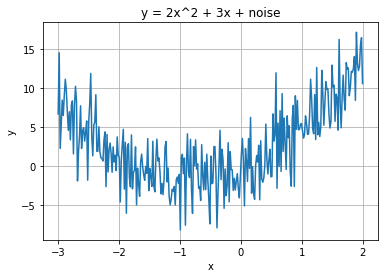

In [10]:
plt.plot(x, y)
plt.title('y = 2x^2 + 3x + noise')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()

A equação mostrada acima representa uma relação não linear entre y e x e portante não pode ser recuperada diretamente através da relação direta entre y e x. Porém podemos obtela através da seguinte relação linear:

$y = x_0\phi_0(a_0) + x1\phi_1(a_0)$ (1)

Onde $\phi_0(x) = x^2$ e $\phi_1 = x$

$y = x_0a_0^2 + x_1a_0$ (2)

Calculando temos:


In [11]:
phi1 = x
phi2 = x**2

In [12]:
from mpl_toolkits.mplot3d import Axes3D

In [13]:
A = np.vstack([phi1, phi2]).T # Matriz phi(A) agora com duas colunas

In [14]:
A.shape

(300, 2)

In [15]:
coefs = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y) # OLS ou MLE

Primeiro vamos ver a relação entre y e $\phi_0$ e $\phi_1$

In [16]:
x_phi = np.linspace(-4, 4, 30)
y_phi = np.linspace(-2, 12, 30)

X, Y = np.meshgrid(x_phi, y_phi)
Z = coefs[0]*X + coefs[1]*Y

Text(0.5, 0, 'Y')

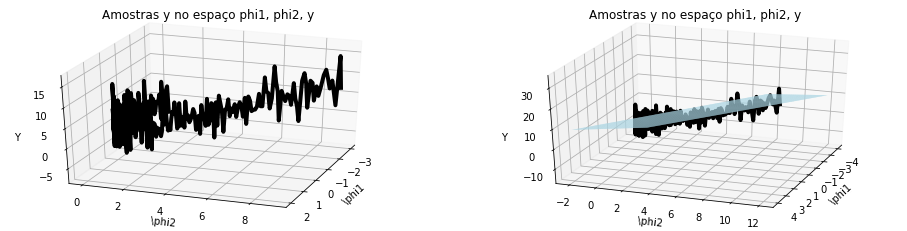

In [17]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(121, projection='3d')
ax.plot3D(phi1, phi2, y, 'k', linewidth=4)
ax.view_init(elev=30, azim=20)
ax.set_title("Amostras y no espaço phi1, phi2, y ")
ax.set_xlabel("\phi1")
ax.set_ylabel("\phi2")
ax.set_zlabel("Y")
ax = fig.add_subplot(122, projection='3d')
ax.plot3D(phi1, phi2, y, 'k', linewidth=4)
ax.plot_surface(X, Y, Z, color='lightblue')
ax.view_init(elev=30, azim=20)
ax.set_title("Amostras y no espaço phi1, phi2, y ")
ax.set_xlabel("\phi1")
ax.set_ylabel("\phi2")
ax.set_zlabel("Y")

Agora vamos ver como fica no espaço original

In [18]:
coefs

array([3.11582354, 1.87785209])

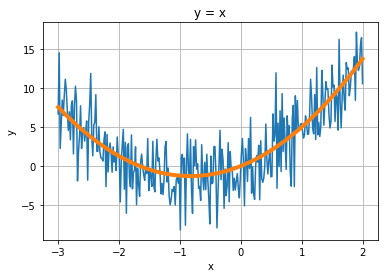

In [19]:
plt.plot(x, y)
plt.plot(x, phi1*coefs[0]+phi2*coefs[1], linewidth=4)
plt.title('y = x')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()

Comparando as figuras acimas podemos entender porque a solução do problema de regressão lienar pode servir mapear uma relação não linear entre x e y. Ao observar como y se comporta em relação a $\phi_0$ e $\phi_1$ (equação 1) vemos que nesse espaço tridimensional a relação é linear ja que todos os pontos ficam em torno de um plano. Ao voltar para o espaço original em uma dimênsão a relação que linear no espaço 3D so torna não linear.

Desse modo, ao expandir o problema de regressão linear podemos mapear nossas variáveis para espaços de dimensão maiores onde esperamos que a relação seja linear. Apos aplicar o critério OLS ou MLE neste espaço de maior dimensão e voltarmos para o espaço original teremos obtido a relação não linear entre as variáveis.

De modo geral relações não linear e complexas podem ficar mais próximas de serem lienares quando usamos funções para expandir a dimensão do espaço das variáveis independentes.

### Conclusão

Neste tópico discutimos:
- O que é regressão lienar
- Resolvemos o problema de regressão linear segundo dois critérios
- Apresentamos as condições para quais a solução com base nesses dois critérios coincidem
- Expandimos a solução do problema de regressão linear para representar relações não lienares
- Apresentamos algums exemplos numéricos do items discutidos